In [1]:
import os 
import tarfile 
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" 
HOUSING_PATH = "datasets/housing" 
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH): 
    if not os.path.isdir(housing_path): 
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz") 
    urllib.request.urlretrieve(housing_url, tgz_path) 
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
# fetch_housing_data()

In [5]:
import pandas as pd 
def load_housing_data(housing_path=HOUSING_PATH): 
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
pd.value_counts(housing['ocean_proximity'])

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [11]:
sns.set()

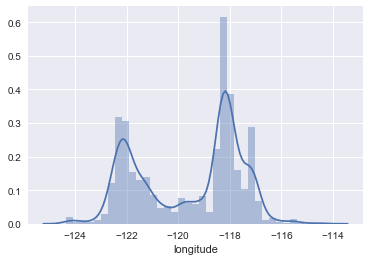

In [12]:
sns.distplot(housing['longitude'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E1B3767B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025E1B71BEF0>]], dtype=object)

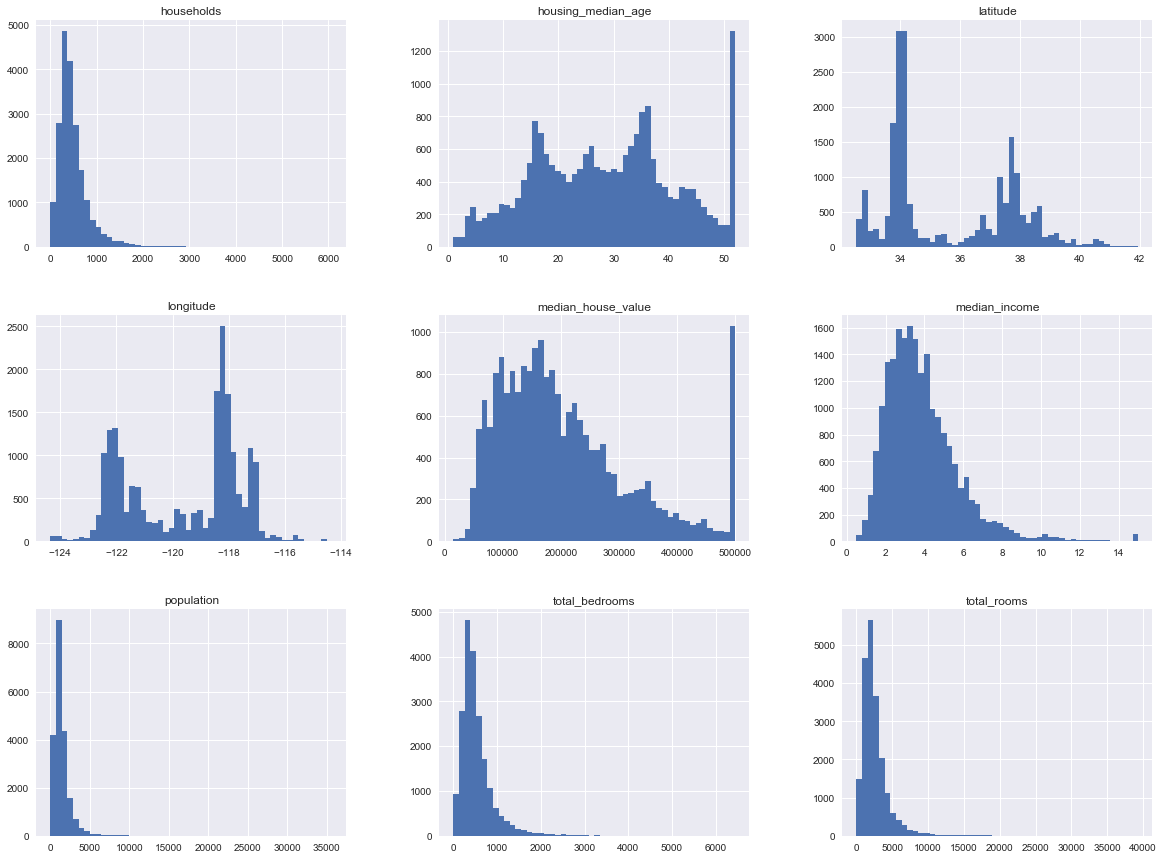

In [13]:
housing.hist(bins=50, figsize=(20,15))

In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

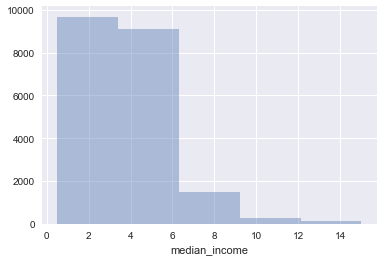

In [15]:
sns.distplot(housing['median_income'],bins=5,kde=False)

In [16]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [17]:
housing['income_cat'].where(housing['income_cat'] < 5 , 5.0 ,inplace=True)

In [18]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,3.0


***分层抽样 ***

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 
for train_index, test_index in split.split(housing, housing["income_cat"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [21]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [22]:
for set in (strat_train_set, strat_test_set): 
    set.drop(["income_cat"], axis=1, inplace=True)

*** discover and visualize data ***

In [25]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


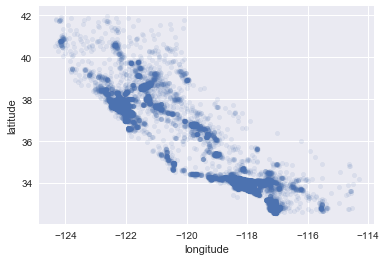

In [27]:
housing.plot(kind='scatter',x='longitude',y='latitude', alpha = 0.1)

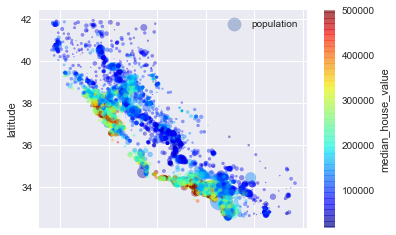

In [33]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, s = housing['population'] / 100, label = 'population', 
            c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)
plt.legend()

*** looking for corr ***

In [35]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [37]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025E22443978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025E22943F98>]], dtype=object)

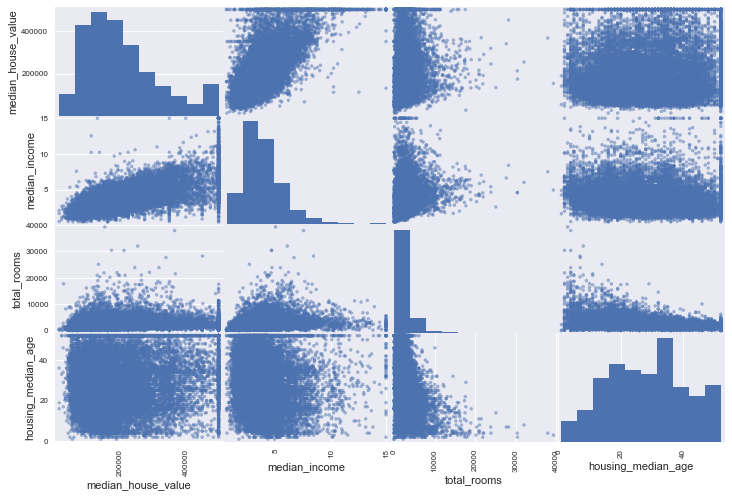

In [43]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))
# sns.pairplot(housing[attributes])


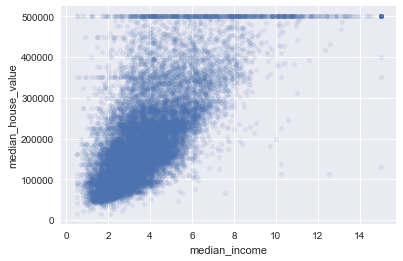

In [44]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [45]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"] 
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [46]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## Prepare the data for ML algorithm

In [50]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()


- housing.dropna(subset=["total_bedrooms"]) **# option 1 **
- housing.drop("total_bedrooms", axis=1)     ** # option 2 **

- median = housing["total_bedrooms"].median() 
- housing["total_bedrooms"].fillna(median)   ** #option 3 **


*** data cleaning ***

In [52]:
from sklearn.preprocessing import Imputer
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer = Imputer(strategy='median')

In [55]:
imputer

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [56]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [58]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [59]:
X = imputer.transform(housing_num)   #np array

In [61]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns) # transform to pd.DataFrame

*** text and categorical attributes ***

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [66]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [68]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [70]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [72]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1)) # fit_transform expect 2-D array, so we reshape
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [73]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

** combine the above 2 methods into 1 **  
*(from text categories to integer categories, then from integer categories to one-hot vectors) *

In [75]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot.shape

(16512, 5)

*** custom transformers ***

In [76]:
from sklearn.base import BaseEstimator, TransformerMixin 
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): 
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None): 
        return self # nothing else to do
    def transform(self, X, y=None): 
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix] 
        population_per_household = X[:, population_ix] / X[:, household_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) 
housing_extra_attribs = attr_adder.transform(housing.values)

*** feature scaling ***  
- MinMaxScaler
- StandardScaler

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([ ('imputer', Imputer(strategy="median")), 
                         ('attribs_adder', CombinedAttributesAdder()), 
                         ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [82]:
housing_num_tr.shape

(16512, 11)

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin 
class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names): 
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X): 
        return X[self.attribute_names].values

In [99]:
# from sklearn.pipeline import FeatureUnion 
# num_attribs = list(housing_num) 
# cat_attribs = ["ocean_proximity"]
# num_pipeline = Pipeline([ ('selector', DataFrameSelector(num_attribs)), 
#                          ('imputer', Imputer(strategy="median")), 
#                          ('attribs_adder', CombinedAttributesAdder()), 
#                          ('std_scaler', StandardScaler())])
# cat_pipeline = Pipeline([ ('selector', DataFrameSelector(cat_attribs)), 
#                          ('label_binarizer', LabelBinarizer())])
# full_pipeline = FeatureUnion(transformer_list=[ ("num_pipeline", num_pipeline), 
#                                                ("cat_pipeline", cat_pipeline)])


from sklearn.base import TransformerMixin #gives fit_transform method for free
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [100]:
from sklearn.pipeline import FeatureUnion 
num_attribs = list(housing_num) 
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([ ('selector', DataFrameSelector(num_attribs)), 
                         ('imputer', Imputer(strategy="median")), 
                         ('attribs_adder', CombinedAttributesAdder()), 
                         ('std_scaler', StandardScaler())])
cat_pipeline = Pipeline([ ('selector', DataFrameSelector(cat_attribs)), 
                         ('label_binarizer', MyLabelBinarizer())])
full_pipeline = FeatureUnion(transformer_list=[ ("num_pipeline", num_pipeline), 
                                               ("cat_pipeline", cat_pipeline)])

In [101]:
housing_prepared = full_pipeline.fit_transform(housing)

In [105]:
housing_prepared.shape

(16512, 16)

In [106]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
19480    127900.0
8879     500001.0
13685    140200.0
4937      95000.0
4861     500001.0
16365     92100.0
19684     61500.0
19234    313000.0
13956     89000.0
2390     123900.0
11176    197400.0
15614    500001.0
2953      63300.0
13209    107000.0
6569     184200.0
5825     280900.0
18086    500001.0
16718    171300.0
13600    116600.0
13989     60800.0
15168    121100.0
6747     270700.0
7398     109900.0
5562     159600.0
16121    500001.0
           ...   
12380    122500.0
5618     350000.0
10060    172800.0
18067    500001.0
4471     146600.0
19786     81300.0
9969     247600.0
14621    164100.0
579      254900.0
11682    185700.0
245      126800.0
12130    114200.0
16441    101800.0
11016    265600.0
19934     88900.0
1364     225000.0
1236     123500.0
5364     500001.0
11703    321600.0
10356    266000.0
15270    346700.0
3754     190200.0
12166    148800.0
6003     214800.0
7364     1

## Select and train a Model

In [107]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse              #underfitting!

68628.198198489234

In [110]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [112]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse          #overfitting!

0.0

*** better evaluation using c-v ***

In [113]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', 
                        cv=10)
rmse_scores = np.sqrt(-scores)


In [114]:
def display_scores(scores):
    print("Scores:", scores) 
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [116]:
display_scores(rmse_scores)

Scores: [ 69151.76109126  67817.44156062  71355.07961817  69314.7386962
  70819.14771629  74262.02677434  71365.70750063  70870.48240873
  77408.5462318   70165.50903619]
Mean: 71253.0440634
Standard deviation: 2616.4942668


In [117]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error",
                             cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


In [121]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                                scoring='neg_mean_squared_error', cv=10)
rmse_forest_scores = np.sqrt(-forest_scores)
display_scores(rmse_forest_scores)

Scores: [ 53136.94107798  51248.40521563  53060.13723758  54215.984555
  53128.96828512  56876.47241721  50921.21450038  50592.82006899
  55605.44393769  51395.00012234]
Mean: 53018.1387418
Standard deviation: 1977.11102993


In [123]:
housing_prediction = forest_reg.predict(housing_prepared)
rmse_frs_scores = np.sqrt(mean_squared_error(housing_labels, housing_prediction))
rmse_frs_scores  # << rmse_forest_scores, implicates still overfitting

22397.99042991269

from sklearn.externals import joblib 
joblib.dump(my_model, "my_model.pkl") 
#and later...
my_model_loaded = joblib.load("my_model.pkl")

## Fine-tune the models

*** Grid search ***

In [128]:
from sklearn.model_selection import GridSearchCV
param_grid = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}] 
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [129]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [130]:
cvres = grid_search.cv_results_  
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(np.sqrt(-mean_score), params)

64146.7582747 {'max_features': 2, 'n_estimators': 3}
55458.7586605 {'max_features': 2, 'n_estimators': 10}
52646.80101 {'max_features': 2, 'n_estimators': 30}
61307.4840226 {'max_features': 4, 'n_estimators': 3}
52941.8709114 {'max_features': 4, 'n_estimators': 10}
50399.8749713 {'max_features': 4, 'n_estimators': 30}
59353.2581966 {'max_features': 6, 'n_estimators': 3}
52037.3821886 {'max_features': 6, 'n_estimators': 10}
50176.5727598 {'max_features': 6, 'n_estimators': 30}
59032.751237 {'max_features': 8, 'n_estimators': 3}
52225.7820876 {'max_features': 8, 'n_estimators': 10}
50257.5767595 {'max_features': 8, 'n_estimators': 30}
63410.1430694 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55071.1325219 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60447.1534495 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52462.5678344 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58531.8019141 {'bootstrap': False, 'max_features': 4, 'n_estimato

*** Randomized search ***
- RandomizedSearchCV 

*** Ensemble methods ***

In [132]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  7.28120505e-02,   6.83915438e-02,   4.45822567e-02,
         1.83385979e-02,   1.66847089e-02,   1.70294116e-02,
         1.67416558e-02,   3.53007900e-01,   4.82520878e-02,
         1.09605882e-01,   7.47625667e-02,   1.21371947e-02,
         1.40382659e-01,   6.64809404e-05,   2.78853976e-03,
         4.41646352e-03])

In [133]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [137]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35300789997046278, 'median_income'),
 (0.14038265939211103, 'INLAND'),
 (0.10960588196472175, 'pop_per_hhold'),
 (0.074762566739642364, 'bedrooms_per_room'),
 (0.072812050520093055, 'longitude'),
 (0.068391543767824012, 'latitude'),
 (0.048252087783110922, 'rooms_per_hhold'),
 (0.044582256686836443, 'housing_median_age'),
 (0.018338597920308532, 'total_rooms'),
 (0.017029411610130406, 'population'),
 (0.016741655790722256, 'households'),
 (0.016684708933234791, 'total_bedrooms'),
 (0.012137194694109694, '<1H OCEAN'),
 (0.0044164635218460167, 'NEAR OCEAN'),
 (0.0027885397644427197, 'NEAR BAY'),
 (6.6480940403115514e-05, 'ISLAND')]

*** evaluate on test set ***

In [138]:
final_model = grid_search.best_estimator_ 
X_test = strat_test_set.drop("median_house_value", axis=1) 
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)   #注意是transform不是fit_transform
final_predictions = final_model.predict(X_test_prepared) 
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [139]:
final_rmse

47763.375282517474